### PIZZA SALES ANALYSIS

In [2]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import calendar

In [3]:
# Important functions:
def style_axes(ax):
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_color('dimgray')

def style_legend(g, legend_text_color='brown', legend_frame=False, legend_title='Class'):
    legend = g._legend
    if legend:
        legend.set_loc('center right')
        legend.set_bbox_to_anchor((1.02, 0.5))
        for text in legend.get_texts():
            text.set_color(legend_text_color)
            text.set_fontweight('bold')
            text.set_fontsize(9)
        legend.set_title(legend_title)
        legend.get_title().set_fontsize(10)
        legend.get_title().set_fontweight('bold')
        legend.get_title().set_color('black')
        legend.set_frame_on(legend_frame)

def style_ticks(ax, x_labelsize=9, y_labelsize=9, x_labelcolor='black', y_labelcolor='black', tick_length=0):
    ax.tick_params(axis='x', labelsize=x_labelsize, labelcolor=x_labelcolor, length=tick_length)
    ax.tick_params(axis='y', labelsize=y_labelsize, labelcolor=y_labelcolor, length=tick_length)

def style_labels_and_title(ax, x_label=None, xcolor='black', xbold=None, y_label=None, ycolor='black', ybold=None, title=None, tcolor='black', tsize=15, tbold=None):
    if x_label:
        ax.set_xlabel(x_label, fontsize=9, color=xcolor, fontweight=xbold)
    if y_label:
        ax.set_ylabel(y_label, fontsize=9, color=ycolor, fontweight=ybold)
    if title:
        ax.set_title(title, fontsize=tsize, color=tcolor, pad=20, fontweight=tbold)

def add_percentage_labels(ax, data, color='dimgray'):
    total = data.sum()
    max_val = data.max()
    
    for i, val in enumerate(data.values):
        percentage = f'{(val / total) * 100:.1f}%'
        ax.text(
            i,                    
            val + (max_val * 0.02),  
            percentage,             
            fontsize=10, 
            fontweight='bold', 
            color=color, 
            ha='center'              
        )
        
def remove_spines(ax, spines=["top", "right", "left", "bottom"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)        

#### Importing Raw Data

In [4]:
df = pd.read_csv(r'pizza_sales.csv')
df.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


#### MetaData of Raw Data

In [5]:
df.tail(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [6]:
print(f'The Metadata of the dataset is: {df.shape}')
print(f'\nThe columns in the dataset are: {df.columns}')

The Metadata of the dataset is: (48620, 12)

The columns in the dataset are: Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


#### Data Types in Raw Data

In [8]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

#### KPI's

In [31]:
total_revenue = df['total_price'].sum()
total_pizza_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_revenue / total_orders 
avg_pizza_per_order = total_pizza_sold / total_orders

print(f'Total Revenue: ${total_revenue:,.0f}')
print(f'Total Pizza Sold: {total_pizza_sold:,}')
print(f'Total Orders: {total_orders:,}')
print(f'Average Order Value (AOV): ${avg_order_value:,.2f}')
print(f'Average Pizza Per Order: {avg_pizza_per_order:,.2f}')

Total Revenue: $817,860
Total Pizza Sold: 49,574
Total Orders: 21,350
Average Order Value (AOV): $38.31
Average Pizza Per Order: 2.32


#### Charts

Ingredient Analysis

In [76]:
plt.style.use('seaborn-v0_8-dark')
sns.set_theme(style="dark")

# 1. Data Logic: Exploding and counting ingredients
ingredient = (df['pizza_ingredients']
              .str.split(',')
              .explode()
              .str.strip()
              .value_counts()
              .reset_index())
ingredient.columns = ['Ingredient', 'Count']

# 2. Creating the Bubble Chart
fig_ing = px.scatter(ingredient.head(20), 
                     x="Ingredient", 
                     y="Count",
                     size="Count", 
                     color="Count",
                     hover_name="Ingredient",
                     # Using your specified color scale
                     color_continuous_scale='YlOrRd_r', 
                     size_max=60)

# 3. Applying the Dark Theme to Plotly
fig_ing.update_layout(
    title="Ingredient Volume Visualization",
    # This matches the Plotly background to dark themes
    template='plotly_dark', 
    xaxis_visible=False, 
    yaxis_visible=False,
    showlegend=False,
    # Making the background transparent to inherit the theme
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=20, r=20, t=50, b=20)
)

# 4. Displaying without the toolbar for a cleaner look
fig_ing.show(config={'displayModeBar': False})

**Garlic, tomatoes, and red onions** are the most favored ingredients that people enjoy on their pizza, closely accompanied by **red peppers and certainly mozzarella cheese**. Conversely, **corn, cilantro, asiago cheese, and bacon** are the least popular ingredients among people.

#### Daily Trend - Total Orders

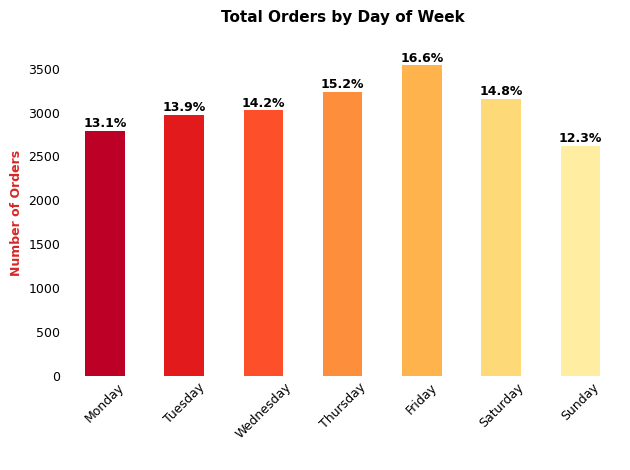

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', color=sns.color_palette("YlOrRd_r", len(orders_by_day)))
style_labels_and_title(ax, x_label=' ', y_label='Number of Orders', ycolor='#d62828', ybold='bold', title='Total Orders by Day of Week', tcolor='black', tbold='bold', tsize=11)
style_ticks(ax)
plt.xticks(rotation=45)
remove_spines(ax)
for i, val in enumerate(orders_by_day):
    percentage = f'{val/total_orders * 100:.1f}%'
    plt.text(i, val+5, percentage, ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

**Friday** is our **"Golden Day"** with the highest number of orders, followed closely by **Thursday** and **Saturday**.

Orders hit the lowest point on **Sundays** and **Mondays**, which is a great time to run some "Mid-week Offers" to boost sales!

#### Daily Trend - Total Revenue

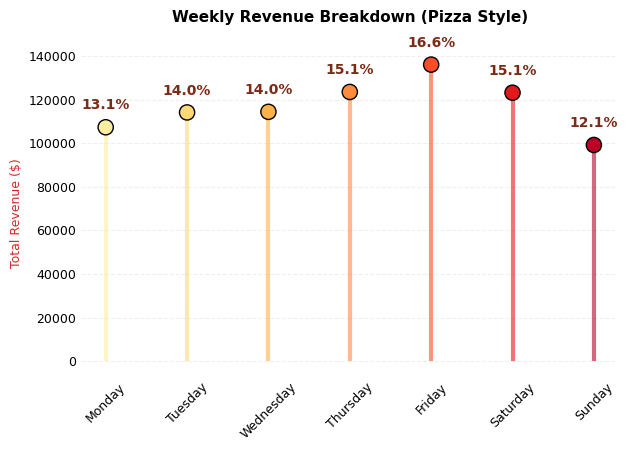

In [34]:
price_by_day = df.groupby('day_name', observed=False)['total_price'].sum()
ax = plt.subplot()
colors = sns.color_palette("YlOrRd", len(price_by_day))
for i, (day, val) in enumerate(price_by_day.items()):
    plt.vlines(x=day, ymin=0, ymax=val, color=colors[i], alpha=0.6, linewidth=3)
plt.scatter(price_by_day.index, price_by_day.values, s=120, color=colors, edgecolors='black', linewidth=1, zorder=3)
for i, val in enumerate(price_by_day):
    percentage = f'{val/total_revenue * 100:.1f}%'
    plt.text(i, val + (price_by_day.max()*0.05), percentage, 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='#7b2c17')
style_labels_and_title(ax, x_label=' ', y_label='Total Revenue ($)',  ycolor='#d62828', title='Weekly Revenue Breakdown (Pizza Style)', tsize=11, tbold='bold')
style_ticks(ax)
plt.xticks(rotation=45)
remove_spines(ax)
ax.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

**Friday** is our **"Money Maker"** with the highest revenue, while we see a steady flow through the **weekend—Time** to capitalize on those high-traffic days! **💸🍕**

#### Daily Trend - Quantitiy

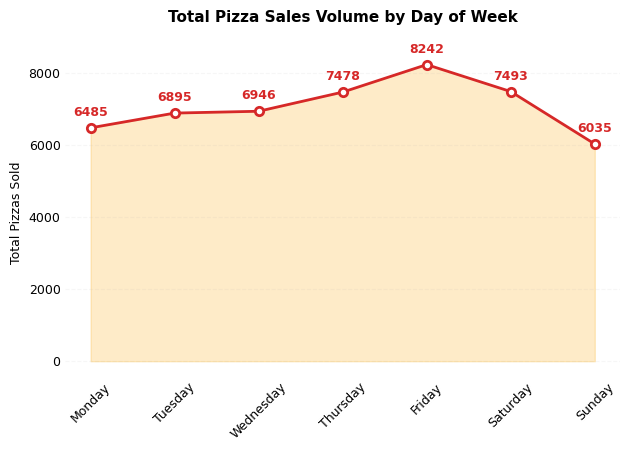

In [35]:
quantity_by_day = df.groupby('day_name', observed=False)['quantity'].sum()
ax = plt.subplot()
plt.plot(quantity_by_day.index, quantity_by_day.values, color='#d62828', marker='o', linewidth=2, markersize=6, markerfacecolor='white', markeredgewidth=2)
plt.fill_between(quantity_by_day.index, quantity_by_day.values, color='#fcbf49', alpha=0.3)
for i, val in enumerate(quantity_by_day):
    plt.text(i, val + (max(quantity_by_day)*0.03), f'{int(val)}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color="#d62828")
style_labels_and_title(ax, x_label=' ', y_label='Total Pizzas Sold', ycolor="#000000", title='Total Pizza Sales Volume by Day of Week', tsize=11, tbold='bold')
style_ticks(ax)
remove_spines(ax)
ax.grid(axis='y', linestyle='--', alpha=0.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Friday** hits the max load with **8,242 pizzas**— Our ovens are literally on fire to keep up with the weekend demand! 🔥🍕

#### Hourly Trend - Total Orders

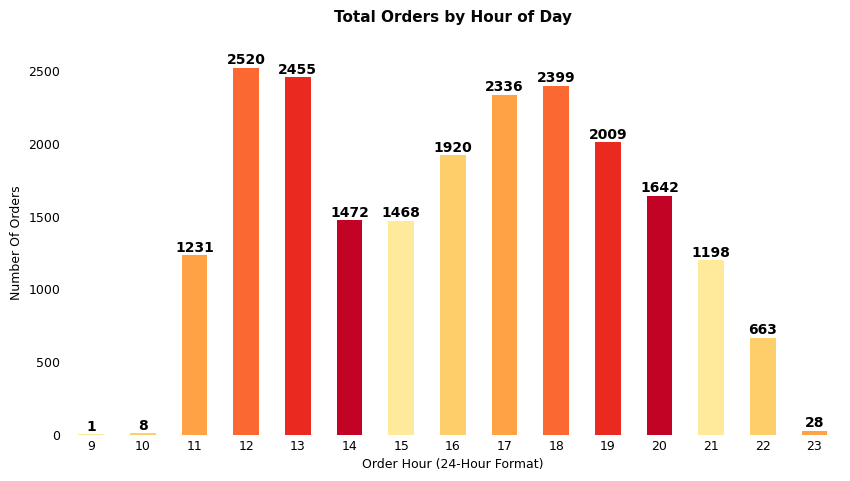

In [39]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['order_hour'] = df['order_time'].dt.hour
orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()
ax = orders_by_hour.plot(kind='bar', color=sns.color_palette('YlOrRd'), figsize=(10,5))
style_labels_and_title(ax, x_label='Order Hour (24-Hour Format)', xcolor="#000000ff", y_label='Number Of Orders', ycolor="#000000ff" , title='Total Orders by Hour of Day', tcolor="#060606ff", tbold='bold', tsize=11)
remove_spines(ax)
style_ticks(ax)
plt.xticks(rotation=0)
for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 6, str(val), ha='center', va='bottom', fontweight='bold', color='black')
plt.show()    

From **11 to 1 afternoon**, the pizza order is high, and it goes down at **2 to 3 in the evening**, and rise up again from **4 till 6**, and then goes down again 

#### Hourly Trend - Total Revenue

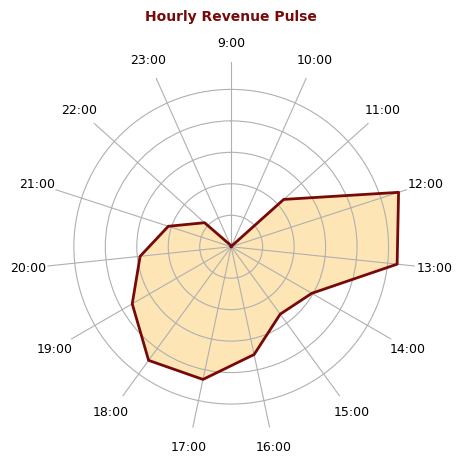

In [43]:
total_revenue_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()
hours = total_revenue_by_hour.index.tolist()
values = total_revenue_by_hour.values.tolist()
hours += [hours[0]]
values += [values[0]]
angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=True)
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='#780909', linewidth=2, linestyle='solid', zorder=3)
ax.fill(angles, values, color='#fcbf49', alpha=0.4)
ax.set_theta_offset(np.pi / 2) 
ax.set_theta_direction(-1)  
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f"{h}:00" for h in hours[:-1]], fontsize=9)
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False) 
plt.title('Hourly Revenue Pulse', size=10, color="#780909", weight='bold', pad=30)
plt.show()

We hit a **"Dead Zone"** between **9-11 AM** with zero revenue, before surging into peak performance during the **12-1 PM** and **4-7 PM** power hours! 🍕💸

#### Hourly Trend - Quantity

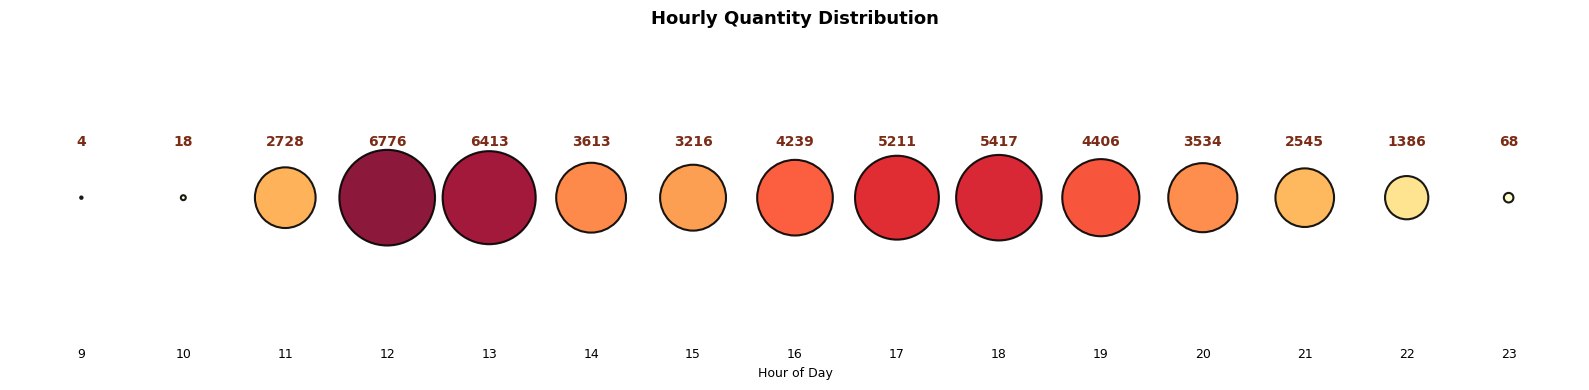

In [48]:
quantity_by_hour = df.groupby('order_hour', observed=False)['quantity'].sum()
hours = quantity_by_hour.index
values = quantity_by_hour.values
plt.figure(figsize=(16, 4))
ax = plt.subplot()
colors = values
plt.scatter(hours, [1]*len(hours), s=values*0.7, c=colors, cmap='YlOrRd', alpha=0.9, edgecolors='black', linewidth=1.5, zorder=3)
for i, (hour, val) in enumerate(quantity_by_hour.items()):
    plt.text(hour, 1.1, f'{int(val)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#7b2c17')
style_labels_and_title(ax, x_label='Hour of Day',  title='Hourly Quantity Distribution', tsize=13, tbold='bold')
ax.get_yaxis().set_visible(False)
remove_spines(ax)
style_ticks(ax)
plt.xticks(hours)
plt.ylim(0.7, 1.3)
plt.tight_layout()
plt.show()

This is clearly highlighting the **12:00 PM - 1:00 PM** rush

#### Monthly Trend - Toral Orders

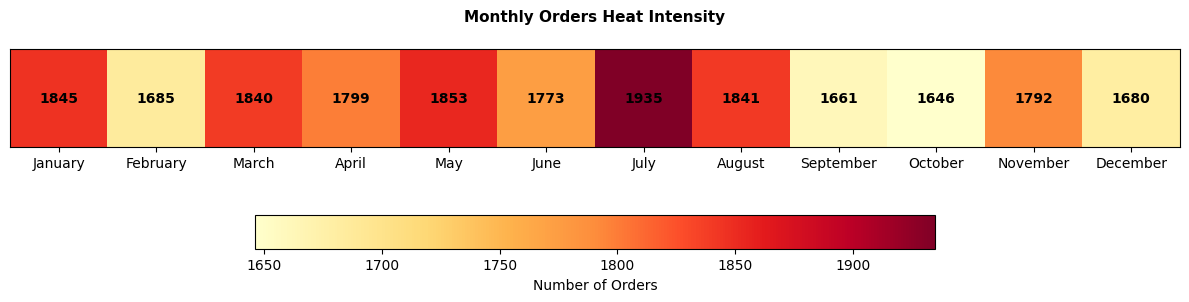

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['month_name'] = df['order_date'].dt.month_name()
month_order = list(calendar.month_name)[1:]
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)
orders_by_month = (df.groupby('month_name', observed=False)['order_id'].nunique().reset_index())
values = orders_by_month['order_id'].values
months = orders_by_month['month_name'].values
fig, ax = plt.subplots(figsize=(12, 3))
heatmap_data = np.expand_dims(values, axis=0)
im = ax.imshow(heatmap_data, cmap='YlOrRd')
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months, fontsize=10)
ax.set_yticks([])
for i, val in enumerate(values):
    ax.text(i, 0, val, ha='center', va='center', fontsize=10, weight='bold')
ax.set_title("Monthly Orders Heat Intensity", fontsize=11, weight='bold', pad=20)
cbar = plt.colorbar(im, orientation='horizontal', pad=0.3)
cbar.set_label('Number of Orders')
plt.tight_layout()
plt.show()

A lot of people order on **July**

#### % Of Sales by Category

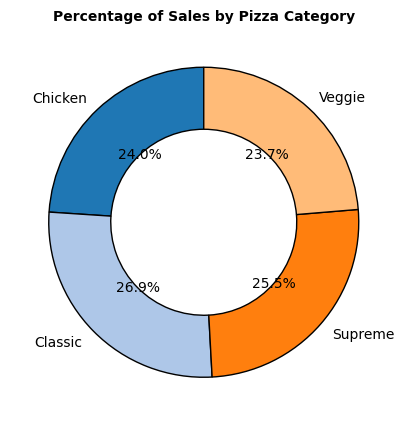

In [18]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_pct = category_sales / category_sales.sum()*100
plt.figure(figsize=(5,7))
colors = plt.get_cmap('tab20').colors
plt.pie(category_pct, labels=category_pct.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black', 'width':0.4})
plt.title('Percentage of Sales by Pizza Category', fontweight='bold', fontsize=10)
plt.show()

The percentages of sales by pizza categories are closed, there is **no big difference**

#### % Of Sales by Pizza Size & Category

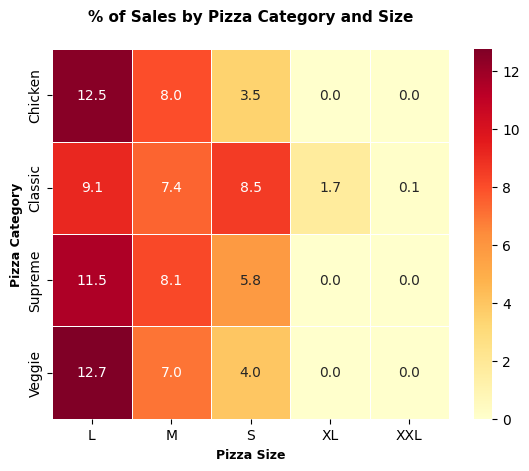

In [19]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)
sales_pct = sales_pivot / sales_pivot.sum().sum()*100
ax = sns.heatmap(sales_pct, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
style_labels_and_title(ax, x_label='Pizza Size', xbold='bold', y_label='Pizza Category', ybold='bold', title='% of Sales by Pizza Category and Size', tbold='bold', tsize=11)
plt.show()

**Veggie** with L size and **Chicken** with L size and in general in L size, all the pizzas are sold at higher level, and the second highest will be all the pizza categories with medium size, **but XL and XXL pizzas** those are very least sold  and sometimes they are not sold at all.

#### Total Pizza Sold by Pizza Category

In [81]:
pizza_by_category = (df.groupby('pizza_category')['quantity']
                     .sum()
                     .reset_index()
                     .sort_values(by='quantity', ascending=False))
fig_funnel = px.funnel(pizza_by_category, 
                       y='pizza_category', 
                       x='quantity',
                       color='pizza_category', # Discrete colors for each stage
                       color_discrete_sequence=px.colors.sequential.YlOrRd_r) 

fig_funnel.update_layout(
    title="Volume Hierarchy by Pizza Category",
    template='plotly_dark',
    showlegend=False
)

fig_funnel.show(config={'displayModeBar': False})

The volume hierarchy identifies <span style='color:#780909; font-weight:bold;'>Classic Pizzas</span> 
as the cornerstone of the menu. This dominance suggests that expanding the 
<span style='color:#780909; font-weight:bold;'>Classic product line</span> offers the 
lowest-risk path for increasing overall transactional volume.

#### Top 5 Best-Selling Pizzas - Total Quantity 

In [21]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum().reset_index()
top5 = pizzas_by_name.sort_values(by='quantity', ascending=False).head(5)

# Create figure
fig = px.treemap(
    top5, path=['pizza_name'],
    values='quantity',
    color='quantity', 
    color_continuous_scale='Sunsetdark',
)

# Style Layout
fig.update_layout(
    template='plotly_dark',
    margin=dict(t=50, l=10, r=10, b=10),
    title={
        'text': "🏆 Top 5 Best Selling Pizzas",
        'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top',
        'font': {'size': 24, 'color': 'white'}
    }
)
# Style Tiles
fig.update_traces(
    textinfo="label+value",
    textfont=dict(size=16, color="white"),
    marker=dict(line=dict(width=2, color='white'))
)
# REMOVE ICONS: Use config to hide the modebar entirely
# If using in Streamlit: st.plotly_chart(fig, use_container_width=True, config={'displayModeBar': False})
# If using standard python:
fig.show(config={'displayModeBar': False})

#### Top 5 Best-Selling Pizzas - Total Orders 

In [22]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique().reset_index()
top5 = pizzas_by_name.sort_values(by='order_id', ascending=False).head(5)
fig = px.treemap(
    top5, 
    path=['pizza_name'], 
    values='order_id', 
    color='order_id', 
    color_continuous_scale='Aggrnyl' 
)
fig.update_layout(
    template='plotly_dark',
    margin=dict(t=80, l=10, r=10, b=10),
    title={
        'text': "🔝 Top 5 Pizzas by Order Count",
        'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top',
        'font': {'size': 24, 'color': 'white'}
    }
)
fig.update_traces(
    textinfo="label+value",
    textfont=dict(size=16, color="white"),
    marker=dict(line=dict(width=2, color='white'))
)
fig.show(config={'displayModeBar': False})


#### Top 5 Best-Selling Pizzas - Total Sales 

In [23]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum().reset_index()
top5 = pizzas_by_name.sort_values(by='total_price', ascending=False).head(5)
fig = px.treemap(
    top5, 
    path=['pizza_name'], 
    values='total_price', 
    color='total_price', 
    color_continuous_scale='Cividis' # New modern color scale
)

fig.update_layout(
    template='plotly_dark',
    margin=dict(t=80, l=10, r=10, b=10),
    coloraxis_showscale=False, # Keeps it clean by hiding the color bar
    title={
        'text': "💰 Top 5 Pizzas by Revenue",
        'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top',
        'font': {'size': 24, 'color': 'white'}
    }
)

fig.update_traces(
    textinfo="label+value",
    texttemplate="<b>%{label}</b><br>$%{value:,.0f}", # Formats as $1,234
    textfont=dict(size=16, color="white"),
    marker=dict(line=dict(width=2, color='white'))
)
fig.show(config={'displayModeBar': False})


### Statistical Analysis

In [24]:
df[['unit_price', 'quantity', 'total_price']].describe().round(1)

,unit_price,quantity,total_price
count,48620.0,48620.0,48620.0
mean,16.5,1.0,16.8
std,3.6,0.1,4.4
min,9.8,1.0,9.8
25%,12.8,1.0,12.8
50%,16.5,1.0,16.5
75%,20.2,1.0,20.5
max,36.0,4.0,83.0


Lower Bound: 1.125
Upper Bound: 32.125 


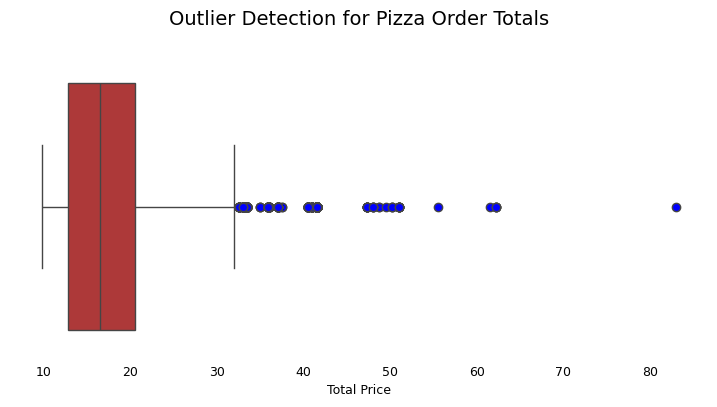

In [25]:
# Draw a Box Plot
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}\nUpper Bound: {upper_bound} ')

plt.figure(figsize=(9,4))
ax = sns.boxplot(x=df['total_price'], color="#C02626", flierprops={'markerfacecolor':"blue"})
style_labels_and_title(ax, x_label='Total Price', title='Outlier Detection for Pizza Order Totals', tsize=14)
remove_spines(ax); style_ticks(ax)
plt.show()

This plot shows that most pizza orders fall between **$12 and $20** (the purple box), with a **median** price of about $16. The pink dots represent **outliers**—unusually expensive orders above $32 that pull the data distribution to the right.

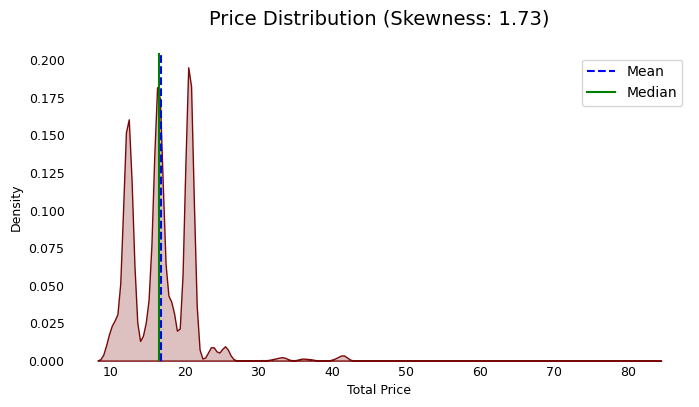

In [26]:
# The Shape Of The Data
skewness = df['total_price'].skew()
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(df['total_price'], fill=True, color='#780909', ax=ax)
plt.axvline(df['total_price'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(df['total_price'].median(), color='green', linestyle='-', label='Median')
style_labels_and_title(ax, title=f"Price Distribution (Skewness: {skewness:.2f})", x_label='Total Price', y_label='Density', tsize=14)
style_ticks(ax); remove_spines(ax)
plt.legend()

This **Kernel Density Estimate (KDE)** plot visualizes the distribution of order totals. With a **Skewness of 1.73**, the data is strongly **Right-Skewed**, meaning the average (Mean) is being inflated by high-value outlier orders. 

* **The Peak (Mode):** Most orders cluster around the \$12 and \$20 marks, likely representing standard individual and meal-deal purchases.
* **Mean vs. Median:** The Blue Dashed line (Mean) sits to the right of the Green Solid line (Median), a classic indicator that high-end outliers are pulling the average upward.

In [27]:
cv = (df['total_price'].std() / df['total_price'].mean()) * 100
print(f"Coefficient of Variation: {cv:.2f}%")

Coefficient of Variation: 26.38%


Because the **Coefficient of Variation is < 30%**, that means the prices are consistent. Most people buy the same types of things.

In [28]:
kurt = df['total_price'].kurt()
print(f"Kurtosis: {kurt:.2f}")

Kurtosis: 8.90


The kurtosis value is high **(anything over 3.0 is considered high)**, indicating that the distribution is leptokurtic. This suggests a significant gap between regular customers and bulk/party customers.

In [29]:
outlier_revenue = df[df['total_price'] > upper_bound]['total_price'].sum()
impact_pct = (outlier_revenue / total_revenue) * 100
print(f"Outlier Revenue Impact: {impact_pct:.2f}%")

Outlier Revenue Impact: 2.90%


Even though those outliers appear dramatic on the chart, they only account for **2.90%** of the total revenue, indicating that the business is highly stable. It does not depend on large "whale" orders to survive.

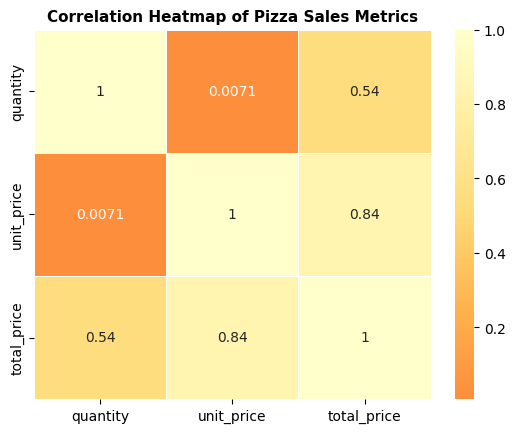

In [54]:
# Correlation Heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['order_id', 'pizza_id'], errors='ignore')
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd_r', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Pizza Sales Metrics', fontsize=11, fontweight='bold')
plt.show()

you can see that Unit Price (0.84) has a much **stronger** **relationship** with the Total Price than Quantity (0.54) does.